In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/ML/HW1

/content/drive/MyDrive/ML/HW1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [16]:
# Load the data
data = pd.read_csv("clust_data.csv")

In [ ]:
# data

In [17]:
# Perform k-means clustering for k from 1 to 15
inertia_values = []

for k in range(1, 16):
    kmeans = KMeans(n_clusters = k, n_init = 10) #, random_state = 0)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

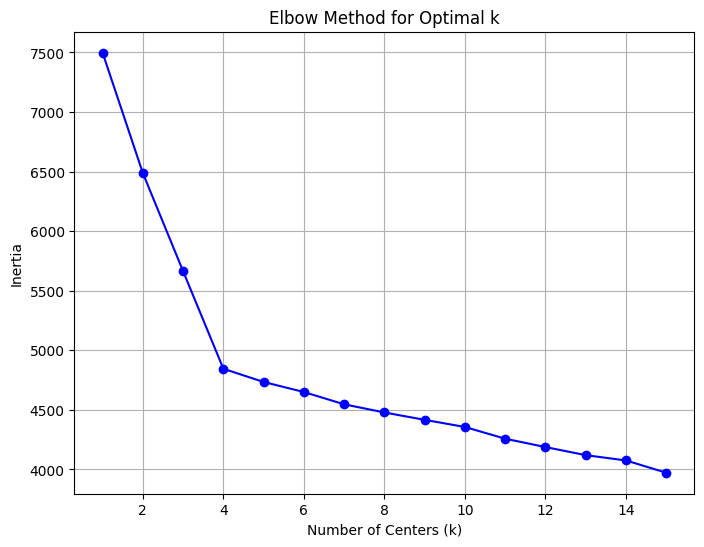

In [18]:
# Plot the values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Centers (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

The optimal k should be 4.

In [19]:
# Re-apply k-means for the chosen number of centers.
chosen_k = 4

kmeans_chosen = KMeans(n_clusters = chosen_k, n_init = 10)
kmeans_chosen.fit(data)

cluster_counts = np.bincount(kmeans_chosen.labels_)

inertia_chosen = kmeans_chosen.inertia_

print(f"Number of observations in each cluster: {cluster_counts}")
print(f"Inertia for chosen k: {inertia_chosen}")

Number of observations in each cluster: [25 25 25 25]
Inertia for chosen k: 4844.925817623824


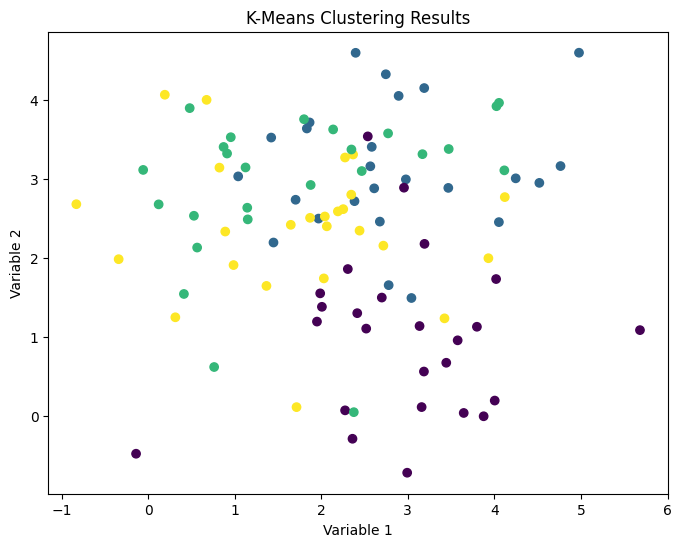

In [22]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = kmeans_chosen.labels_)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('K-Means Clustering Results')
plt.show()